In [125]:
import os
import pandas as pd 
from fbprophet import Prophet

import plotly.express as px 
import plotly.graph_objs as go
import plotly.io as pio

from dateutil.relativedelta import relativedelta


pio.templates.default = "plotly_white"

print(f"cwd : {os.getcwd()}")

cwd : /Users/imantha/workspace/cryo-polygen/ts


In [98]:
def load_data(path, last_date = "2022-05-18 23:00:00"):
    df = pd.read_excel(path, header = None)
    df.rename(columns = {0 : "y"}, inplace = True)
    last_ts = pd.to_datetime(last_date, format = "%Y-%m-%d %H:%M:%S")
    ts = [last_ts - relativedelta(hours=  x) for x in range(df.shape[0])]
    ts.sort()
    df["ds"] = ts
    return df 



In [99]:
df = load_data(path = os.path.join("data","load.xlsx"))
print(df.shape)
p = px.line(x = df.ds, y = df.y)
p.show()

(4380, 2)


In [142]:
train_size = int(df.shape[0] - 0.3 * df.shape[0])
test_size = df.shape[0] - train_size
df_train = df[:train_size]
df_test = df[train_size:]


print(f"Train size : {train_size},Test size : {test_size}")
print(f"df shape : {df.shape}")
print(f"df_train shape : {df_train.shape}")
print(f"df_test shape : {df_test.shape}")

print(f"Total data, start date : {df.ds.values[0]}, end_date : {df.ds.values[-1]}")
print(f"Training data, start date : {df_train.ds.values[0]}, end_date : {df_train.ds.values[-1]}")
print(f"Testing data, start date : {df_test.ds.values[0]}, end_date : {df_test.ds.values[-1]}")


Train size : 3066,Test size : 1314
df shape : (4380, 2)
df_train shape : (3066, 2)
df_test shape : (1314, 2)
Total data, start date : 2021-11-17T12:00:00.000000000, end_date : 2022-05-18T23:00:00.000000000
Training data, start date : 2021-11-17T12:00:00.000000000, end_date : 2022-03-25T05:00:00.000000000
Testing data, start date : 2022-03-25T06:00:00.000000000, end_date : 2022-05-18T23:00:00.000000000


# Prophet

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -47.1981
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6470.42    0.00330145       161.665      0.7974     0.07974      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       6477.83    0.00010189       88.3492   6.725e-07       0.001      261  LS failed, Hessian reset 
     199        6478.9    0.00294095       121.448      0.3246           1      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       6480.77    0.00033474        114.19   5.322e-06       0.001      402  LS failed, Hessian reset 
     299       6481.17   0.000409582       72.4673           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6482.79   0.000209492       93.5729      0.5063      0.5063      583   
    Iter      log pro

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



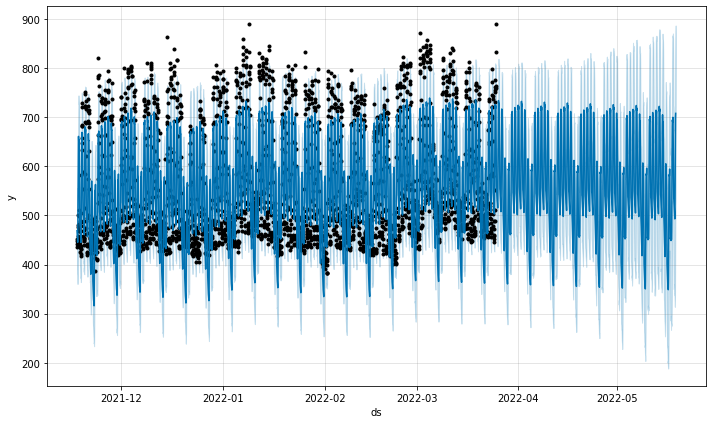

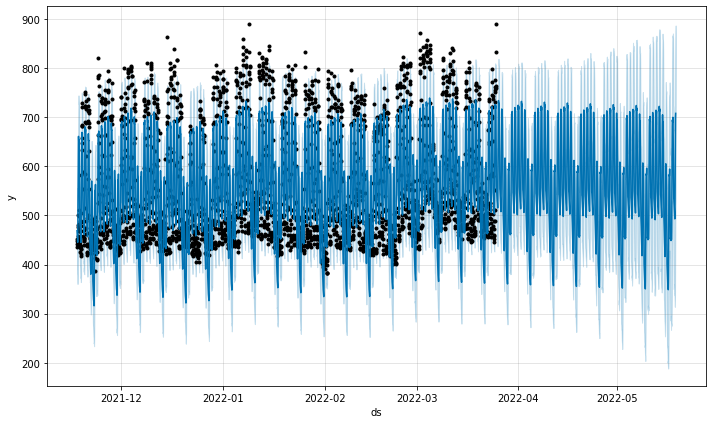

In [145]:
m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=test_size, freq = "H")
fcst = m.predict(future)
m.plot(fcst)

In [157]:
p = go.Figure()
p.add_trace(go.Scatter(
    x = df.ds,
    y = df.y,
    mode = "lines",
    line = dict(color = "dodgerblue"),
    name = "original ts"
))
p.add_trace(go.Scatter(
    x = fcst.ds,
    y = fcst.yhat,
    mode = "lines",
    line = dict(color = "fuchsia"),
    name = "prediction"
))

p.show()

In [159]:
from sklearn.metrics import mean_squared_error

In [161]:
print(f"Mean squared error : {mean_squared_error(y_true=df.y, y_pred = fcst.yhat)}")

Mean squared error : 5419.52276827911


# LSTM